# FOOD PRICE TREND ANALYZER

This project explores how the prices of key food commodities in Kenya have changed over time, across different counties and market categories. The goal is to help both customers and sellers gain a clearer understanding of market price dynamics, enabling them to make smarter decisions when it comes to budgeting, planning, and buying or selling food products.

Using real-world data, the analysis provides a visual and interactive breakdown of:

Price fluctuations over time

Regional differences across counties

Trends by commodity category (e.g., cereals, pulses, tubers)

Wholesale price behaviors and patterns

The insights generated here are visualized through a dashboard designed to simplify complex data, making it easier for everyday users to track trends and anticipate changes in food pricing.

## DATA LOADING AND EDA

In [22]:
import pandas as pd
import numpy as np
import os

url= r"C:/Users/laura/Desktop/Projects/Food-pricing-prediction/Data"
os.chdir(url)

df= pd.read_csv('wfp_food_prices_ken.csv')
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355


In [23]:
original= df.copy()
original.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.0,0.2355


In [24]:
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767,10767
unique,216,8,23,63,63,63,9,48,15,3,3,2,5239,8246
top,2021-03-15,Rift Valley,Nairobi,Nairobi,-1.283333,36.816667,cereals and tubers,Maize (white),KG,actual,Wholesale,KES,10.0,0.09
freq,375,4163,2290,1138,1138,1138,5311,1128,4783,7150,5752,10766,240,21


In [25]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

In [26]:
df['market'].value_counts()

market
Nairobi                       1138
Eldoret town (Uasin Gishu)     916
Kisumu                         674
Mombasa                        452
Kitui                          407
                              ... 
Wote town (Makueni)             18
Makueni                         16
Dadaab town                     16
Vanga (Kwale)                    4
#loc+market+name                 1
Name: count, Length: 63, dtype: int64

In [27]:
df.drop(columns=['admin1','latitude','longitude','usdprice','currency'],inplace=True)
df

,date,admin2,market,category,commodity,unit,priceflag,pricetype,price
0,#date,#adm2+name,#loc+market+name,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#value
1,2006-01-15,Mombasa,Mombasa,cereals and tubers,Maize,KG,actual,Wholesale,16.13
2,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,33.63
3,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,3246.0
4,2006-01-15,Kitui,Kitui,cereals and tubers,Maize (white),KG,actual,Retail,17.0
...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Turkana,Mogadishu (Kakuma),cereals and tubers,Maize flour,KG,aggregate,Retail,92.0
10763,2023-12-15,Turkana,Mogadishu (Kakuma),cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,73.0
10764,2023-12-15,Turkana,Mogadishu (Kakuma),"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,800.0
10765,2023-12-15,Turkana,Mogadishu (Kakuma),miscellaneous food,Salt,200 G,aggregate,Retail,10.0


In [28]:
df.drop(0,inplace=True)
df.head()

,date,admin2,market,category,commodity,unit,priceflag,pricetype,price
1,2006-01-15,Mombasa,Mombasa,cereals and tubers,Maize,KG,actual,Wholesale,16.13
2,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,33.63
3,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,3246.0
4,2006-01-15,Kitui,Kitui,cereals and tubers,Maize (white),KG,actual,Retail,17.0
5,2006-01-15,Kitui,Kitui,pulses and nuts,Beans (dry),KG,actual,Retail,39.0


In [29]:
df.isnull().sum()

date         0
admin2       0
market       0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
price        0
dtype: int64

In [30]:
df['unit'].value_counts()

unit
KG        4783
90 KG     2541
50 KG     1118
L          576
500 ML     355
200 G      272
64 KG      270
13 KG      255
126 KG     246
Unit       214
400 G      106
Bunch       18
Head        11
200 ML       1
Name: count, dtype: int64

In [31]:
df.rename(columns={'admin2':'County'},inplace=True)
df

,date,County,market,category,commodity,unit,priceflag,pricetype,price
1,2006-01-15,Mombasa,Mombasa,cereals and tubers,Maize,KG,actual,Wholesale,16.13
2,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,33.63
3,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,3246.0
4,2006-01-15,Kitui,Kitui,cereals and tubers,Maize (white),KG,actual,Retail,17.0
5,2006-01-15,Kitui,Kitui,pulses and nuts,Beans (dry),KG,actual,Retail,39.0
...,...,...,...,...,...,...,...,...,...
10762,2023-12-15,Turkana,Mogadishu (Kakuma),cereals and tubers,Maize flour,KG,aggregate,Retail,92.0
10763,2023-12-15,Turkana,Mogadishu (Kakuma),cereals and tubers,Potatoes (Irish),KG,aggregate,Retail,73.0
10764,2023-12-15,Turkana,Mogadishu (Kakuma),"meat, fish and eggs",Meat (goat),KG,aggregate,Retail,800.0
10765,2023-12-15,Turkana,Mogadishu (Kakuma),miscellaneous food,Salt,200 G,aggregate,Retail,10.0


In [32]:
unit_rows = df[df['unit'] == 'Unit']
unit_rows

,date,County,market,category,commodity,unit,priceflag,pricetype,price
4335,2020-08-15,Nairobi,Nairobi,vegetables and fruits,Bananas,Unit,actual,Retail,8.0
7156,2018-01-15,Garissa,Dagahaley (Daadab),vegetables and fruits,Bananas,Unit,aggregate,Retail,10.0
7170,2021-01-15,Mombasa,Kalahari (Mombasa),vegetables and fruits,Bananas,Unit,aggregate,Retail,10.0
7187,2021-01-15,Nairobi,Kangemi (Nairobi),vegetables and fruits,Bananas,Unit,aggregate,Retail,10.0
7196,2021-01-15,Nairobi,Kawangware (Nairobi),vegetables and fruits,Bananas,Unit,aggregate,Retail,10.0
...,...,...,...,...,...,...,...,...,...
10622,2023-11-15,Turkana,HongKong (Kakuma),vegetables and fruits,Bananas,Unit,aggregate,Retail,20.0
10640,2023-11-15,Turkana,Kakuma 3,vegetables and fruits,Bananas,Unit,aggregate,Retail,20.0
10687,2023-12-15,Garissa,Dagahaley (Daadab),vegetables and fruits,Bananas,Unit,aggregate,Retail,10.0
10719,2023-12-15,Turkana,HongKong (Kakuma),vegetables and fruits,Bananas,Unit,aggregate,Retail,20.0


In [33]:
# Converting the values in unit column to be inharmony. i.e G - KG and ML to L
g_pattern_mask = df['unit'].str.contains(r'\d+\s*G$', na=False)
df.loc[g_pattern_mask, 'unit'] = 'KG'

# Convert simple 'G' to 'KG'
df['unit'] = df['unit'].replace({'G': 'KG'})

# Convert units containing 'ML' to 'L' (e.g., '500 ML' → 'L')
ml_pattern_mask = df['unit'].str.contains(r'\d+\s*ML$', na=False)
df.loc[ml_pattern_mask, 'unit'] = 'L'

# Convert simple 'ML' to 'L'
df['unit'] = df['unit'].replace({'ML': 'L'})

# Optional: Clean up any remaining units that might have patterns
# Handle cases like '200 ML' -> 'L', '400 G' -> 'KG'
df['unit'] = df['unit'].str.replace(r'\d+\s*G$', 'KG', regex=True)
df['unit'] = df['unit'].str.replace(r'\d+\s*ML$', 'L', regex=True)


print(df['unit'].value_counts())

unit
KG        5161
90 KG     2541
50 KG     1118
L          932
64 KG      270
13 KG      255
126 KG     246
Unit       214
Bunch       18
Head        11
Name: count, dtype: int64


In [34]:
df.head()

,date,County,market,category,commodity,unit,priceflag,pricetype,price
1,2006-01-15,Mombasa,Mombasa,cereals and tubers,Maize,KG,actual,Wholesale,16.13
2,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans,KG,actual,Wholesale,33.63
3,2006-01-15,Mombasa,Mombasa,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,3246.0
4,2006-01-15,Kitui,Kitui,cereals and tubers,Maize (white),KG,actual,Retail,17.0
5,2006-01-15,Kitui,Kitui,pulses and nuts,Beans (dry),KG,actual,Retail,39.0


# VISUALIZATION

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime

In [36]:
#   How have  prices for each commodity have changed over the years
fig = px.line(df, 
              x='date', 
              y='price', 
              color='commodity',
              line_group='County',
              title='Price Trend Over Time by Commodity',
              labels={'price': 'Price (KES)', 'date': 'Date'})
fig.show()


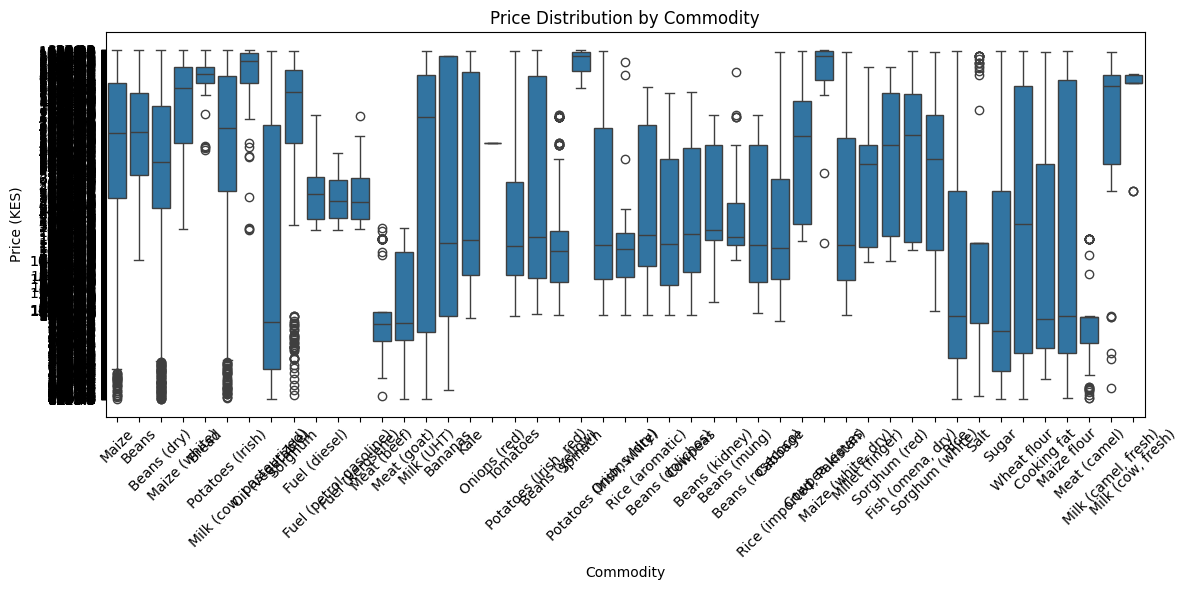

In [ ]:
# Spread and skewness of pricses of commodities

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='commodity', y='price')
plt.title('Price Distribution by Commodity')
plt.xticks(rotation=45)
plt.ylabel('Price (KES)')
plt.xlabel('Commodity')
plt.tight_layout()
plt.show()

#From the graph, sellers understand clearly the pricing of a specific commodity if it is fair or not and also detecting anomalies

In [ ]:
# How prices vary from one county to another
# Remove unwanted characters and convert to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])


county_avg = df.groupby('County')['price'].mean().reset_index()

fig = px.bar(county_avg, 
             x='County', 
             y='price', 
             title='Average Commodity Price by County',
             labels={'price': 'Average Price (KES)'})
fig.show()

# Here, regional price differences are identified
# Sellers and transporters can identify profitable markets: Machakos,Mer south, West pokot
# Cutomers see which regions have cheaper food prices

In [ ]:
# How is the same commodity priced over time in different counties?

# Filter for maize only
maize_df = df[df['commodity'].str.contains('Maize', case=False)]

fig = px.line(maize_df, 
              x='date', 
              y='price', 
              facet_col='County', 
              facet_col_wrap=4,
              title='Maize Price Trends Across Counties Over Time',
              labels={'price': 'Price (KES)', 'date': 'Date'})
fig.show()

# This helps sellers benchmark prices against neighboring counties and allows buyers to understand local trends.
#  It also reveals whether counties follow similar seasonal trends or behave independently.

In [ ]:
# Comparison of average price

In [ ]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

df['date']= pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
df_sorted = df.sort_values('date')
plt.plot(df_sorted['date'], df_sorted['price'], alpha=0.6, marker='.', linestyle='')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""Price trend over time"""


"""MARKET COMPARISON - AVERAGE PRICES"""
plt.figure(figsize=(12, 8))


df_plot = df.copy()
df_plot['price'] = pd.to_numeric(df_plot['price'], errors='coerce')
df_plot = df_plot.dropna(subset=['price'])


market_avg = df_plot.groupby('market')['price'].mean().sort_values(ascending=False).head(20)
market_avg.plot(kind='bar')

plt.title('Average Prices by Market (Top 20)')
plt.xlabel('Market')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
""" SEASONAL PRICE PATTERNS (MONTHLY)"""
plt.figure(figsize=(12, 6))


df_plot = df.copy()
df_plot['price'] = pd.to_numeric(df_plot['price'], errors='coerce')


df_plot = df_plot.dropna(subset=['price'])


df_plot['month'] = df_plot['date'].dt.month
df_plot['year'] = df_plot['date'].dt.year


monthly_avg = df_plot.groupby('month')['price'].mean()
monthly_avg.plot(kind='line', marker='o')

plt.title('Average Monthly Price Patterns')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
"""OUTLIER DETECTION - PRICE DISTRIBUTION"""
plt.figure(figsize=(12, 6))


df_plot = df.copy()
df_plot['price'] = pd.to_numeric(df_plot['price'], errors='coerce')
df_plot = df_plot.dropna(subset=['price'])


Q1 = df_plot['price'].quantile(0.25)
Q3 = df_plot['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_plot_filtered = df_plot[(df_plot['price'] >= lower_bound) & (df_plot['price'] <= upper_bound)]

plt.subplot(1, 2, 1)
plt.hist(df_plot_filtered['price'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df_plot['price'])
plt.title('Price Boxplot (Outliers)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()
df.head()
# Feature Engineering
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

# 1. Initialize the encoder
enc_market = OneHotEncoder()

# 2. Fit and transform the 'market' column
market_encoded = enc_market.fit_transform(df['market'].values.reshape(-1, 1)).toarray()

# 3. Create column names for the new one-hot encoded features
market_cols = enc_market.get_feature_names_out(['market'])

# 4. Convert to DataFrame
market_df = pd.DataFrame(market_encoded, columns=market_cols)

# 5. Concatenate with the original DataFrame
df_encoded = pd.concat([df.reset_index(drop=True), market_df], axis=1)

# 6. (Optional) Drop the original 'market' column if no longer needed
df_encoded.drop(columns=['market'], inplace=True)
df_encoded
# 1. Calculate the frequency (i.e., count) of each unique unit
unit_freq = df_encoded['unit'].value_counts().to_dict()

# 2. Map each unit to its frequency
df_encoded['unit_freq'] = df_encoded['unit'].map(unit_freq)
df_encoded.drop(columns=['unit'],inplace=True)
df_encoded

df['category'].value_counts()
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
enc_cat = OneHotEncoder()

# Fit-transform and convert to DataFrame
category_encoded = enc_cat.fit_transform(df_encoded['category'].values.reshape(-1, 1)).toarray()
category_cols = enc_cat.get_feature_names_out(['category'])

# Combine with main DataFrame
category_df = pd.DataFrame(category_encoded, columns=category_cols)
df_encoded = pd.concat([df_encoded.reset_index(drop=True), category_df], axis=1)

# Drop original column
df_encoded.drop(columns=['category'], inplace=True)
df_encoded
